# Loading Libraries

In [1]:
# Importing Libs
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn.impute import SimpleImputer # Perform Imputation
from sklearn.preprocessing import OneHotEncoder,LabelEncoder # Perform OneHotEnconding
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score,r2_score # Evaluating the Model
from sklearn.model_selection import train_test_split
# from sklearn import metrices
#warnings
import warnings
warnings.filterwarnings("ignore")
# os.chdir("/content/drive/MyDrive/Midterm-project_I")

In [58]:
%%capture
!pip install xgboost==1.6.1

# Weather Data

## 1. Load Weather Data

In [2]:
# dff=pd.read_csv('df_merged_final.csv',index_col=[0])
# dff

In [ ]:
dff.describe()

In [ ]:
#plot distributions
axes = dff.iloc[:,35:49].hist(layout=(5,6), alpha=0.5, label='x',figsize=(25, 15))
plt.tight_layout()
plt.show()

In [ ]:
# plot precipitation distribution
axes = dff.iloc[:,42:43].hist(layout=(1,1), alpha=0.5, label='x',figsize=(25, 15), bins=30)
plt.tight_layout()
plt.show()

## 2.Weather Feature Engineering

In [ ]:
# encode the weather data at origin
def newlabel_origin(df):
    
    if df['Origincloudcover']<40 and df['OriginprecipMM'] == 0:
        return "clear"
    if df['Origincloudcover']>=40 and df['OriginprecipMM'] == 0:
        return "cloudy"
    if 0<df['OriginprecipMM']<=10:
        return "lightrain"
    if 10<df['OriginprecipMM']<=25:
        return "heavyrain"
    if df['OriginprecipMM']>25:
        return "storm"

df['Weather_origin']=df.apply(newlabel_origin, axis=1)

# encode the weather data at destination
def newlabel_destin(df):
    
    if df['Destincloudcover']<40 and df['DestinprecipMM'] == 0:
        return "clear"
    if df['Destincloudcover']>=40 and df['DestinprecipMM'] == 0:
        return "cloudy"
    if 0<df['DestinprecipMM']<=10:
        return "lightrain"
    if 10<df['DestinprecipMM']<=25:
        return "heavyrain"
    if df['DestinprecipMM']>25:
        return "storm"

df['Weather_destin']=df.apply(newlabel_destin, axis=1)

In [ ]:
# encode the visibility 
def visibility_origin(df):
    
    if df['Originvisibility']<7:
        return "lowvisibility"
    if 7<=df['Originvisibility']<9:
        return "mediumvisbility"
    if df['Originvisibility']>=9:
        return "highvisibility"
    

df['Visibility_origin']=df.apply(visibility_origin, axis=1)

def visibility_destin(df):
    if df['Destinvisibility']<7:
        return "lowvisibility"
    if 7<=df['Destinvisibility']<9:
        return "mediumvisbility"
    if df['Destinvisibility']>=9:
        return "highvisibility"
    
df['Visibility_destin']=df.apply(visibility_destin, axis=1)

In [ ]:
#encode the wind speed
def windspeed_origin(df):
    
    if df['OriginwindgustKmph']<45:
        return "lowwindspeed"
    if df['OriginwindgustKmph']>=45:
        return "highwindspeed"

dff['windspeed_origin']=dff.apply(windspeed_origin, axis=1)


def windspeed_destin(df):
    
    if df['DestinwindgustKmph']<45:
        return "lowwindspeed"
    if df['DestinwindgustKmph']>=45:
        return "highwindspeed"
    
dff['windspeed_destin']=dff.apply(windspeed_destin, axis=1)

In [ ]:
dff[dff.isnull().any(axis=1)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph,windspeed_origin,windspeed_destin


In [ ]:
#Exporting CSV file with weather features to add more features
# dff.to_csv('df_merged_final_weathermodified.csv')#remove redundant weather columns
colstodrop = ['OriginmaxtempC', 'OriginmintempC',
       'Origintotalsnow_cm', 'Originsunhour', 'OriginfeelslikeC',
       'OriginheatindexC', 'OriginwindchillC', 'OriginwindgustKmph',
       'Origincloudcover', 'Originhumidity', 'OriginprecipMM', 'OrigintempC',
       'Originvisibility', 'OriginwindspeedKmph', 'DestinmaxtempC',
       'DestinmintempC', 'Destintotalsnow_cm', 'Destinsunhour',
       'DestinfeelslikeC', 'DestinheatindexC', 'DestinwindchillC',
       'DestinwindgustKmph', 'Destincloudcover', 'Destinhumidity',
       'DestinprecipMM', 'DestintempC', 'Destinvisibility',
       'DestinwindspeedKmph']


dff.drop(colstodrop,axis=1,inplace=True)

In [ ]:
#Exporting CSV file with weather features to add more features
# dff.to_csv('df_merged_final_weathermodified.csv')

In [ ]:
#correlation matrix
dff.corr()

# Flight InfomationData

In [42]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Midterm-project_I")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.Load Data

In [9]:
df_original=pd.read_csv('df_merged_final_weathermodified.csv',index_col=[0] )

In [5]:
# df_original=dff

In [6]:
# df_original.drop(['Unnamed: 0.1','new','arr_time_time'],axis=1,inplace=True)

In [7]:
# df_original.to_csv('df_merged_final_weathermodified.csv')

In [10]:
df_original.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,actual_elapsed_time,air_time,flights,distance,Weather_origin,Weather_destin,Visibility_origin,Visibility_destin,windspeed_origin,windspeed_destin
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,70.0,35.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
1,2018-01-01,DL,DL_CODESHARE,DL,4579,OO,N8903A,4579,15380,TVC,...,61.0,37.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
2,2018-01-01,DL,DL_CODESHARE,DL,4669,OO,N931EV,4669,15380,TVC,...,67.0,32.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
3,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,...,137.0,88.0,1.0,651.0,clear,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed
4,2018-01-01,NK,NK,NK,342,NK,N637NK,342,13487,MSP,...,85.0,69.0,1.0,528.0,cloudy,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed


In [11]:
df_original.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'Weather_origin', 'Weather_destin', 'Visibility_origin',
       'Visibility_destin', 'windspeed_origin', 'windspeed_destin'],
      dtype='object')

In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              715371 non-null  object 
 1   mkt_unique_carrier   715371 non-null  object 
 2   branded_code_share   715371 non-null  object 
 3   mkt_carrier          715371 non-null  object 
 4   mkt_carrier_fl_num   715371 non-null  int64  
 5   op_unique_carrier    715371 non-null  object 
 6   tail_num             715371 non-null  object 
 7   op_carrier_fl_num    715371 non-null  int64  
 8   origin_airport_id    715371 non-null  int64  
 9   origin               715371 non-null  object 
 10  origin_city_name     715371 non-null  object 
 11  dest_airport_id      715371 non-null  int64  
 12  dest                 715371 non-null  object 
 13  dest_city_name       715371 non-null  object 
 14  crs_dep_time         715371 non-null  int64  
 15  dep_time         

In [13]:
df_original.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
Weather_origin         0
Weather_destin         0
Visibility_origin      0
Visibility_destin      0
windspeed_origin       0
windspeed_destin       0
dtype: int64

### inital selection

In [14]:
df_original.select_dtypes('object').columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'op_unique_carrier', 'tail_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'dup', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin'],
      dtype='object')

In [15]:
tmp=df_original.drop(['mkt_unique_carrier','branded_code_share','dup',
                     'tail_num'],axis=1)

In [20]:
df_original.select_dtypes('number').columns

Index(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

In [21]:
df=tmp.drop(['mkt_carrier_fl_num','op_carrier_fl_num',
             'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in'],axis=1)

In [22]:
df.describe()

,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.0,715371.0,715371.000000,715371.000000,715371.000000,715371.0,715371.000000
mean,12729.078274,12728.462852,1327.639232,1333.976279,9.320171,1500.783914,1486.942108,3.500860,0.0,0.0,140.202960,134.302492,108.541114,1.0,766.439963
std,1520.989300,1521.355197,480.032456,490.394490,48.216715,501.028342,515.135782,51.080054,0.0,0.0,74.221431,72.480371,70.820044,0.0,590.547855
min,10135.000000,10135.000000,4.000000,1.000000,-330.000000,1.000000,1.000000,-260.000000,0.0,0.0,-90.000000,16.000000,4.000000,1.0,31.000000
25%,11292.000000,11292.000000,921.000000,926.000000,-6.000000,1115.000000,1107.000000,-17.000000,0.0,0.0,88.000000,82.000000,58.000000,1.0,337.000000
50%,12892.000000,12892.000000,1320.000000,1330.000000,-3.000000,1523.000000,1517.000000,-8.000000,0.0,0.0,120.000000,115.000000,89.000000,1.0,595.000000
75%,14082.000000,14092.000000,1730.000000,1736.000000,5.000000,1917.000000,1916.000000,6.000000,0.0,0.0,170.000000,164.000000,137.000000,1.0,1005.000000
max,16218.000000,16218.000000,2359.000000,2400.000000,1690.000000,2400.000000,2400.000000,1707.000000,0.0,0.0,1645.000000,737.000000,691.000000,1.0,4983.000000


## 2.Data Clean

### a.null value

In [23]:
df.isnull().sum()

fl_date                0
mkt_carrier            0
op_unique_carrier      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
Weather_origin         0
Weather_destin         0
Visibility_origin      0
Visibility_destin      0
windspeed_origin       0
windspeed_destin       0
dtype: int64

### b.Datetime Conversion

We convert date of flight to datetime format and add day of week

In [24]:
df=df_original.copy()

In [25]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [26]:
df['weekday']=df['fl_date'].dt.dayofweek

In [27]:
df.weekday.unique()

array([0, 5, 6, 1, 2, 3, 4])

### c.Categorize distance

In [ ]:
# #Discretization
# df['distance_cat'] = pd.qcut(df['distance'], q=4)

In [ ]:
# #divide distance into four interval in miles: very short, short, mid, long distance
# df.distance_cat.unique()

## 3.Exploratory Data Analysis

*is_delayed indicator

In [28]:
#new feature: is_delayed

result = []
for value in df['arr_delay']:
    if value > 0:
        result.append(1)
    elif value <= 0:
        result.append(0)

df['is_delayed'] = result  


In [10]:
df_airline=df[df['is_delayed']==1].groupby('op_unique_carrier').agg({'is_delayed':'count','arr_delay':'mean'}).reset_index()


In [11]:
df_airline=df_airline.rename(columns={'is_delayed':'numberofdelay','arr_delay':'arr_delay_airline'})

In [12]:
top_10_airline=df_airline.sort_values(by='numberofdelay',ascending=False).head(10)

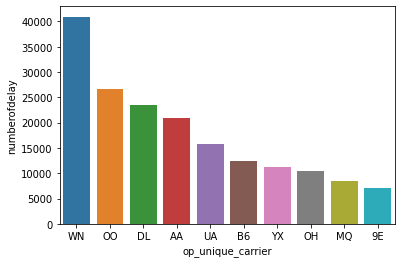

In [13]:
sns.barplot(x='op_unique_carrier',y='numberofdelay',data=top_10_airline)

### which airline is likely to delay?

In [36]:
df_delay=df.groupby('op_unique_carrier')['flights','is_delayed'].sum().reset_index()

In [187]:
df_delay['percentage']=100*round(df_delay['is_delayed']/df_delay['flights'],3)

In [188]:
df_percent=df_delay.sort_values(by='percentage',ascending=False).head(10)

In [189]:
df_percent

,op_unique_carrier,flights,is_delayed,percentage
15,KS,165.0,100,60.6
6,C5,3881.0,1987,51.2
16,MQ,18020.0,8470,47.0
4,AX,8171.0,3494,42.8
5,B6,30151.0,12381,41.1
11,F9,12084.0,4702,38.9
27,ZW,9473.0,3679,38.8
18,OH,27333.0,10551,38.6
12,G4,8050.0,3099,38.5
26,YX,30632.0,11243,36.7


In [117]:
df_airline=pd.read_csv('airlines.csv')


In [132]:
df_airline

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [118]:
lst={'IATA_CODE':'YX',
     'AIRLINE':'Republic Airways'}

In [128]:
df_airline=df_airline.append({'IATA_CODE':'OH','AIRLINE':'PSA Airline'},ignore_index = True)

In [129]:
df_airline=df_airline.append(lst, ignore_index = True)


In [133]:
df_airline=df_airline.append({'IATA_CODE':'9E','AIRLINE':'Endeavor Air'},ignore_index = True)

In [206]:
df_airline=df_airline.append({'IATA_CODE':'KS','AIRLINE':'Peninsula Airway'},ignore_index = True)


In [207]:
df_a=df_delay.sort_values(by='flights',ascending=False).head(10)

In [209]:
new=df_a.merge(df_airline,left_on='op_unique_carrier',right_on='IATA_CODE')

In [210]:
new

,op_unique_carrier,flights,is_delayed,percentage,IATA_CODE,AIRLINE
0,WN,136477.0,40927,30.0,WN,Southwest Airlines Co.
1,DL,90875.0,23532,25.9,DL,Delta Air Lines Inc.
2,OO,73705.0,26694,36.2,OO,Skywest Airlines Inc.
3,AA,64447.0,20887,32.4,AA,American Airlines Inc.
4,UA,55876.0,15719,28.1,UA,United Air Lines Inc.
5,YX,30632.0,11243,36.7,YX,Republic Airways
6,B6,30151.0,12381,41.1,B6,JetBlue Airways
7,OH,27333.0,10551,38.6,OH,PSA Airline
8,9E,23190.0,7060,30.4,9E,Endeavor Air
9,AS,22349.0,6278,28.1,AS,Alaska Airlines Inc.


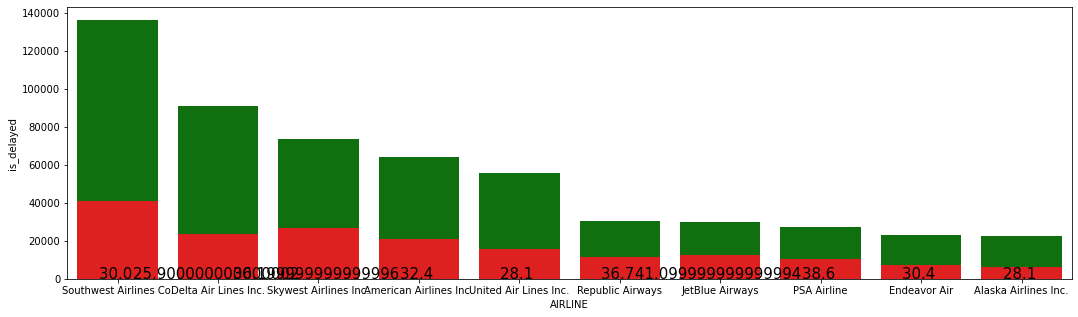

In [200]:
fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(x='AIRLINE', y='flights',data=new,color='green')
sns.barplot(x='AIRLINE', y='is_delayed',data=new,color='red')
# for x,y in enumerate(new.percentage):
#     plt.text(x,y+10,"%s "%y, ha='center',ma='center',fontsize=15)

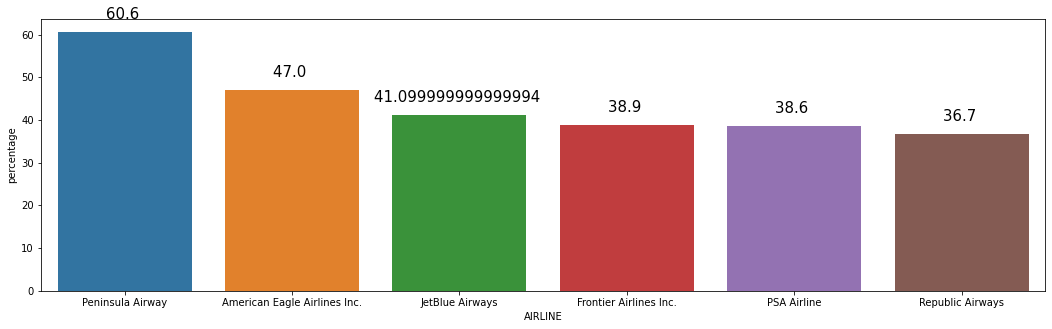

In [219]:
df_percent=df_percent.merge(df_airline,left_on='op_unique_carrier',right_on='IATA_CODE')
fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(x='AIRLINE', y='percentage',data=df_percent)
for x,y in enumerate(df_percent.percentage):
    plt.text(x,y+3,"%s "%y, ha='center',ma='center',fontsize=15)

### 10 busiest airport-pairs with average delay by airline

In [20]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday'],
      dtype='object')

In [14]:
df_origin_busiest=df.groupby(['origin']).agg({'flights':'count',}).sort_values(by='flights',ascending=False).reset_index().head(10)

In [15]:
df_origin_busiest

,origin,flights
0,ATL,38141
1,ORD,34402
2,DEN,25447
3,LAX,24567
4,CLT,24379
5,PHX,18187
6,SEA,17402
7,SFO,17131
8,IAH,16996
9,LGA,16777


In [191]:
df_dest_busiest=df.groupby(['dest']).agg({'flights':'count',}).sort_values(by='flights',ascending=False).reset_index().head(10)

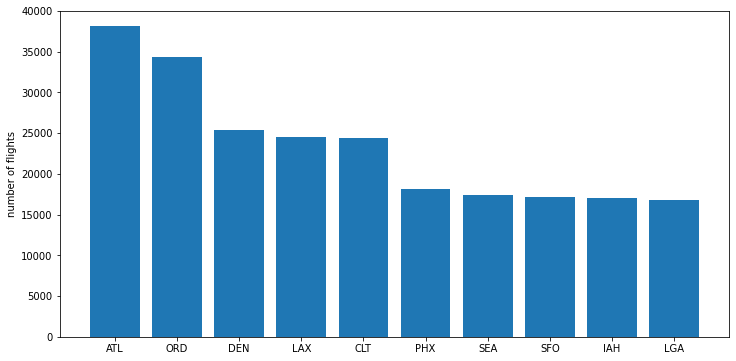

In [17]:
x=df_origin_busiest.origin
y=df_origin_busiest.flights
X=df_dest_busiest.dest
Y=df_dest_busiest.flights
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,y, align='center')
ax.set_ylabel('number of flights')
ax.set_xticks(x)




In [194]:
airport=list(df_dest_busiest.dest)

In [195]:
#20
airport=list(df_dest_busiest.dest)

In [18]:
df_origin_busiest

,origin,flights
0,ATL,38141
1,ORD,34402
2,DEN,25447
3,LAX,24567
4,CLT,24379
5,PHX,18187
6,SEA,17402
7,SFO,17131
8,IAH,16996
9,LGA,16777


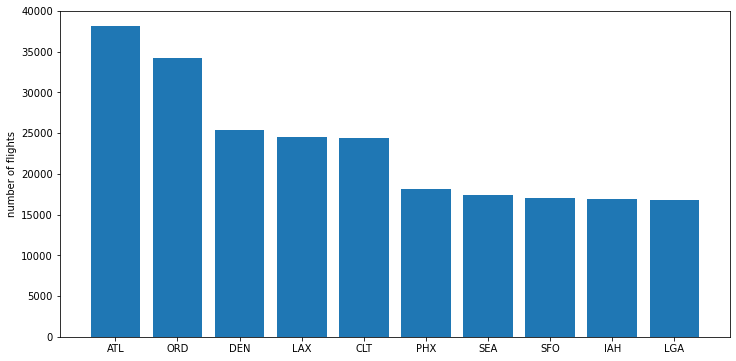

In [190]:
X=df_dest_busiest.dest
Y=df_dest_busiest.flights
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(X,Y, align='center')
ax.set_ylabel('number of flights')
ax.set_xticks(X)


In [19]:
businest_airport=['ATL', 'ORD', 'DEN', 'LAX', 'CLT', 'PHX', 'SEA', 'SFO', 'IAH', 'LGA']

*Above are the top ten businest airports with the most flights. both as departure and as desination airports

* Group the average arr_delay by each route and airlines

In [20]:
df_route=df.groupby(['origin','dest','op_unique_carrier']).agg({'flights':'count',
                    'is_delayed':'sum'}).sort_values(by='flights',ascending=False).reset_index()

In [21]:
df_route=df_route.rename(columns={'is_delayed':'avg_arr_delay'})

In [22]:
df_route['delay_percentage']=round(df_route['avg_arr_delay']/df_route['flights'],2)

In [23]:
df_route.sort_values('delay_percentage',ascending=False)

,origin,dest,op_unique_carrier,flights,avg_arr_delay,delay_percentage
11044,COU,DEN,AX,1,1,1.0
11097,PIT,JFK,YX,1,1,1.0
11080,SGF,DEN,G7,1,1,1.0
10721,CRW,ATL,EV,2,2,1.0
11081,XNA,ORD,ZW,1,1,1.0
...,...,...,...,...,...,...
10844,IAH,BNA,YX,2,0,0.0
9510,PIE,ORF,G4,11,0,0.0
10847,MSP,ALB,DL,2,0,0.0
10848,ORD,ORF,UA,2,0,0.0


In [24]:
businest_airport=['ATL', 'ORD', 'DEN', 'LAX', 'CLT', 'PHX', 'SEA', 'SFO', 'IAH', 'LGA']

In [ ]:
df_SlightlyDelay=df[df['arr_delay_cat']=="SlightlyDelay"]
df_VeryDelay=df[df['arr_delay_cat']=="VeryDelay"]


In [ ]:
#SlightlyDelay:0-30minutes late
#in each group: analyze the airline behavior

In [ ]:
df_SlightlyDelay

,Unnamed: 0.1,fl_date,mkt_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,Weather_origin,Weather_destin,Visibility_origin,Visibility_destin,windspeed_origin,windspeed_destin,weekday,arr_delay_hr,arr_delay_cat,is_delayed
4,10602,2018-01-01,NK,NK,MSP,"Minneapolis, MN",DTW,"Detroit, MI",1830,1912.0,...,cloudy,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,0.25,SlightlyDelay,1
7,17039,2018-01-01,DL,DL,MSP,"Minneapolis, MN",DTW,"Detroit, MI",845,904.0,...,cloudy,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,0.12,SlightlyDelay,1
10,2285,2018-01-01,DL,G7,IND,"Indianapolis, IN",DTW,"Detroit, MI",1016,1015.0,...,clear,lightrain,mediumvisbility,highvisibility,lowwindspeed,lowwindspeed,0,0.02,SlightlyDelay,1
13,18559,2018-01-01,DL,YX,IND,"Indianapolis, IN",DTW,"Detroit, MI",615,613.0,...,clear,lightrain,mediumvisbility,highvisibility,lowwindspeed,lowwindspeed,0,0.27,SlightlyDelay,1
17,3338,2018-01-01,NK,NK,RSW,"Fort Myers, FL",DTW,"Detroit, MI",1640,1631.0,...,lightrain,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,0.07,SlightlyDelay,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715356,1233875,2019-01-31,HA,EM,HNL,"Honolulu, HI",MKK,"Hoolehua, HI",1444,1456.0,...,lightrain,lightrain,highvisibility,highvisibility,highwindspeed,highwindspeed,3,0.32,SlightlyDelay,1
715359,1233868,2019-01-31,HA,EM,HNL,"Honolulu, HI",JHM,"Kapalua, HI",936,956.0,...,lightrain,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,0.43,SlightlyDelay,1
715360,1233873,2019-01-31,HA,EM,HNL,"Honolulu, HI",JHM,"Kapalua, HI",1226,1214.0,...,lightrain,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,0.18,SlightlyDelay,1
715363,1233871,2019-01-31,HA,EM,HNL,"Honolulu, HI",LNY,"Lanai, HI",1101,1134.0,...,lightrain,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,0.50,SlightlyDelay,1


In [ ]:
# df_arrline_dep_delay = pd.DataFrame({'arrline_dep_delay' : df.groupby([ 'op_unique_carrier'] )['dep_delay'].mean()}).reset_index()
# df_arrline_arr_delay = pd.DataFrame({'arrline_arr_delay' : df.groupby([ 'op_unique_carrier'] )['arr_delay'].mean()}).reset_index()


In [ ]:
# df_airline=df_arrline_dep_delay.merge(df_arrline_arr_delay,on='op_unique_carrier')

In [ ]:
# df_dest_arr_delay = pd.DataFrame({'dest_arr_delay' : df.groupby([ 'dest'] )['arr_delay'].mean()}).reset_index()
# df_origin_dep_delay = pd.DataFrame({'origin_dep_delay' : df.groupby([ 'origin'] )['dep_delay'].mean()}).reset_index()


In [10]:
businest_airport=['ATL', 'ORD', 'DEN', 'LAX', 'CLT', 'PHX', 'SEA', 'SFO', 'IAH', 'LGA']

In [ ]:
df=df.merge(df_airline,on='op_unique_carrier')

In [ ]:
df=df.merge(df_dest_arr_delay,on='dest')

In [ ]:
df=df.merge(df_origin_dep_delay,on='origin')

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'arr_time_time', 'new',
       'Weather_origin', 'Weather_destin', 'Visibility_origin',
       'Visibility_destin', 'windspeed_origin', 'windspeed_destin', 'weekday',
       'arr_delay_hr', 'arr_delay_cat', 'is_delayed', 'arrline_dep_delay',
       'arrline_arr_delay', 'dest_arr_delay', 'origin_dep_delay'],
      dtype='object')

### delay by time

#### b.1. categorize arr_delay by day of week:
* are flights tends to delay during the weekdays or weekends?

In [8]:
df['weekday'].unique()

array([0, 5, 6, 1, 2, 3, 4])

In [ ]:
ind=df[df['weekday'].isin([1,2,3,4,0])].index
df.loc[ind,'DAY_OF_WEEK']="WeekDay"

In [ ]:
ind=df[df['weekday'].isin([5,6])].index
df.loc[ind,'DAY_OF_WEEK']="WeekEnd"

In [ ]:
dayofweek = df[['DAY_OF_WEEK',
                    'is_delayed']].groupby('DAY_OF_WEEK').sum().sort_values(by='is_delayed',ascending=False)


In [ ]:
print('>> Delayed flights by dayofweek<<')
print(dayofweek)

>> Delayed flights by dayofweek<<
             is_delayed
DAY_OF_WEEK            
WeekDay          183068
WeekEnd           49860


In [ ]:
dayofweek

,is_delayed
DAY_OF_WEEK,
WeekDay,183068
WeekEnd,49860


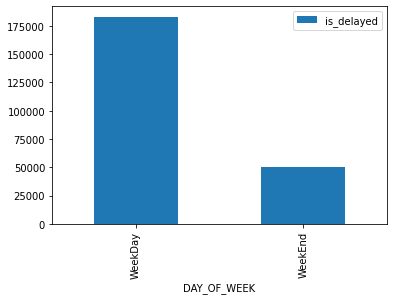

In [ ]:
dayofweek.plot(kind='bar')

plt.legend()
plt.show()

#### b.2. creating time block desination

In [116]:
def arr_time(x):
    if x>=700 and x<=1200:
        return "Morning"
    elif x>1200 and x<=1800:
        return "Afternoon"
    elif x>1800 and x<=2300:
        return "Evening"
    elif (x>2300 and x<=2400) or (x<700):
        return "RedEye"
    

In [117]:
# We can create ARR_TIME_BLOCK.
df['crs_arr_timeblk'] = df['crs_arr_time'].apply(lambda x :arr_time(x))

In [118]:
# We can create DEP_TIME_BLOCK.
df['crs_dep_timeblk'] = df['crs_dep_time'].apply(lambda x :arr_time(x))

In [119]:
# df=df.merge(avg_dep_dely_timeblk,on='dep_timeblk')

In [49]:
dfff=df[df['is_delayed']==1]

In [50]:
df_rounte_day_timeblk_airline_avg_arr=df.groupby(['origin','dest','crs_arr_timeblk','op_unique_carrier']).agg({'arr_delay':'mean',
                      }).reset_index()

In [51]:
df_rounte_day_timeblk_airline_avg_arr=df_rounte_day_timeblk_airline_avg_arr.rename(columns={'arr_delay':'route_day_timeblk_airline_avg_arr'})

In [120]:
df_rounte_day_timeblk_airline_arr=df.groupby(['origin','dest','crs_arr_timeblk','op_unique_carrier']).agg({'arr_delay':'mean',
                      }).reset_index().rename(columns={'arr_delay':'route_day_timeblk_airline_avg_arr'})

In [121]:
df_rounte_day_timeblk_airline_dep=df.groupby(['origin','dest','crs_dep_timeblk','op_unique_carrier']).agg({'dep_delay':'mean',}).reset_index().rename(columns={'dep_delay':'route_day_timeblk_airline_avg_dep'})

In [122]:
df=df.merge(df_rounte_day_timeblk_airline_arr,on=['origin','dest','crs_arr_timeblk','op_unique_carrier'])

In [123]:
df=df.merge(df_rounte_day_timeblk_airline_dep,on=['origin','dest','crs_dep_timeblk','op_unique_carrier'])

### 3.Delay by city

In [ ]:
df_dest = df[['dest',
              'is_delayed']].groupby('dest').sum().sort_values(by='is_delayed',ascending=False).reset_index()
df_dest['percentage'] = df_dest['is_delayed']/(df_dest['is_delayed'].sum())


In [ ]:
df_dest.head()

,dest,is_delayed,percentage
0,ORD,14105,0.060555
1,ATL,10358,0.044469
2,CLT,7897,0.033903
3,DEN,7590,0.032585
4,LGA,7428,0.031890


In [ ]:
df_origin = df[['origin','dep_delay']].groupby('origin').sum().sort_values(by='dep_delay',ascending=False)
df_origin['percentage'] = df_origin['dep_delay']/(df_origin['dep_delay'].sum())*100
df_origin.head()

,dep_delay,percentage
origin,,
ORD,663286.0,9.948226
ATL,333271.0,4.998530
LGA,281670.0,4.224598
DTW,266628.0,3.998992
DEN,250546.0,3.757788


In [ ]:
df_final.to_csv('df_finalversion_data_final.csv')
# df_final=pd.read_csv('df_finalversion_data_final.csv',index_col=[0])

In [ ]:
import pickle
# pickle_in=open("df_finalversion_data_final.pickle","wb")
# pickle.dump(df_final,pickle_in)
# pickle_in.close()
df_airport.to_csv('df_finalversion_data_final_top10airports.csv')

In [ ]:
pickle_out=open('df_finalversion_data_final.pickle',"rb")
df_final=pickle.load(pickle_out)

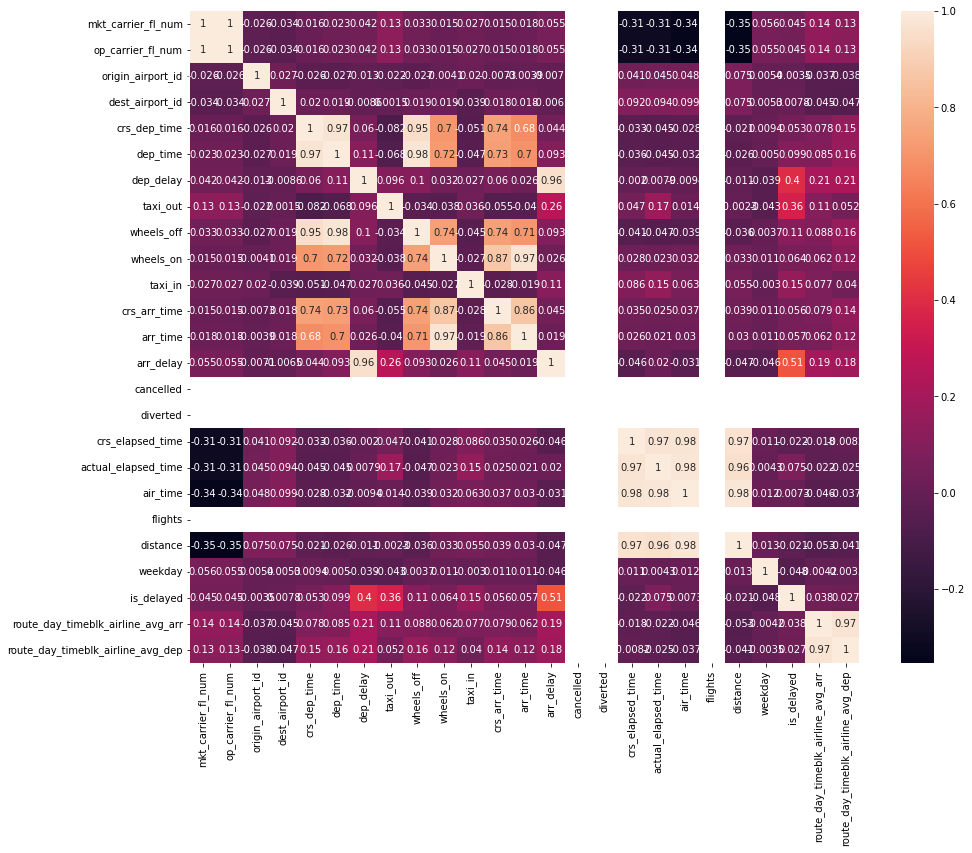

In [81]:
axis = plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

# Regression


## Data Preprocessing

In [219]:
tmpppp=df.groupby(['dest']).agg({'flights':'count',}).sort_values(by='flights',ascending=False).reset_index().head(50)

In [222]:
airport=list(tmpppp.dest)

In [243]:
airport

['ATL',
 'ORD',
 'DEN',
 'LAX',
 'CLT',
 'PHX',
 'SEA',
 'SFO',
 'IAH',
 'LGA',
 'LAS',
 'DTW',
 'EWR',
 'MSP',
 'DCA',
 'MCO',
 'PHL',
 'BOS',
 'JFK',
 'SLC',
 'FLL',
 'BWI',
 'MIA',
 'SAN',
 'IAD',
 'PDX',
 'TPA',
 'DAL',
 'MDW',
 'BNA',
 'STL',
 'SJC',
 'RDU',
 'HOU',
 'AUS',
 'MSY',
 'MCI',
 'OAK',
 'SMF',
 'HNL',
 'CLE',
 'IND',
 'PIT',
 'CVG',
 'RSW',
 'CMH',
 'SNA',
 'SAT',
 'MKE',
 'JAX']

In [149]:
dff=df[(df['dest'].isin(businest_airport))&(df['origin'].isin(businest_airport))]

In [223]:
dff=df[(df['dest'].isin(airport))&(df['origin'].isin(airport))]

In [ ]:
df.to_csv('df_full.csv')

### ONEHOTENCODE

In [59]:
#  df_airport =pd.read_csv('df_finalversion_data_final_top10airports.csv')
#  df_final_modeling=df_airport.copy()

In [224]:
# df_sample=df_final.sample(n=10000)
df_sample=dff.copy()

In [225]:
X=df_sample.drop('arr_delay',axis=1)

In [226]:
y=df_sample['arr_delay']

In [227]:
X.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'Weather_origin', 'Weather_destin', 'Visibility_origin',
       'Visibility_destin', 'windspeed_origin', 'windspeed_destin', 'weekday',
       'is_delayed', 'crs_arr_timeblk', 'crs_dep_timeblk',
       'route_day_timeblk_airline_avg_arr',
       'route_day_timeblk_airline_avg_dep'],
      dtype='object')

In [228]:
#Select features

In [229]:
X_tmp=X[['dest_airport_id','origin_airport_id','op_unique_carrier','dest','origin','crs_arr_time','crs_dep_time','crs_elapsed_time',
       'Weather_origin', 'Weather_destin','crs_arr_timeblk','crs_dep_timeblk','weekday',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin','route_day_timeblk_airline_avg_arr',
       'route_day_timeblk_airline_avg_dep','distance']]



In [230]:
# X_tmp.corr()

In [231]:
# #one-hot encoded
# enc=OneHotEncoder()
# X_encoded=enc.fit_transform(X_tmp)
X_encoded=pd.get_dummies(X_tmp)

In [232]:
y.shape

(422434,)

In [233]:
X_encoded.shape

(422434, 162)

In [234]:
# X_1 = enc.fit_transform(X_tmp)


In [235]:
X_encoded.shape

(422434, 162)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=0)

### LABELENCODER

In [239]:
X=df_sample.drop('arr_delay',axis=1)

In [240]:
y=df_sample['arr_delay']

In [154]:
X_tmp=X[['dest_airport_id','origin_airport_id','dest','origin','crs_arr_time',
       'Weather_origin', 'Weather_destin','crs_arr_timeblk','crs_dep_timeblk','weekday',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin','route_day_timeblk_airline_avg_arr',
        'route_day_timeblk_airline_avg_dep']]

# X_tmp=X[['origin_airport_id','distance','op_unique_carrier','dest','origin','crs_dep_time','crs_arr_time',]]


In [155]:
enc=LabelEncoder()
x=X_tmp.apply(enc.fit_transform)


In [156]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Modeling RandomForestRegressor

In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [239]:
# rfr = RandomForestRegressor()
# rfr.fit(X_train,y_train)

RandomForestRegressor()

In [246]:
rfr=RandomForestRegressor(n_estimators=200,min_samples_split=15,min_samples_leaf=5,max_features='auto',max_depth=18)

In [247]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=5, min_samples_split=15,
                      n_estimators=200)

In [248]:
y_pred = rfr.predict(X_test)

In [249]:
rfr.score(X_train,y_train)

0.3713133312070409

In [250]:
rfr.score(X_test,y_test)

0.19909389099325003

In [81]:
r2_score(y_test,y_pred)

0.2115066426550869

In [ ]:
#evaluation

In [80]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 

In [81]:
#Randomized Search CV

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [18,20]
# Minimum number of samples required to split a node
min_samples_split = [10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10]


In [82]:
# Create the random grid
# n_estimators:Number of trees in random forest

random_grid = {'n_estimators': [200,250],
               'max_features': ['auto'],
               'max_depth': [15,16,18],
               'min_samples_split': [10,15],
               'min_samples_leaf': [3,5,10]}


In [83]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rfr, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 5, cv = 5, 
                               verbose=2, random_state=42, 
                               n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=250; total time=  44.2s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=250; total time=  46.7s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=250; total time=  46.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=250; total time=  45.6s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=250; total time=  47.9s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250; total time=  47.3s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=250; total time=  44.4s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [15, 16, 18],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [3, 5, 10],
                                        'min_samples_split': [10, 15],
                                        'n_estimators': [200, 250]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 18}

In [88]:
y_predict=rf_random.predict(X_test)


In [89]:
r2_score(y_test,y_predict)

0.26710413630511454

## Modeling XGBoost


In [ ]:
import xgboost as xgb
### XGBoost

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#define model
#model = xgb.XGBRegressor(tree_method = 'gpu_hist')
model = xgb.XGBRegressor(tree_method = 'hist')

In [ ]:
#parameter definition
params = {"n_estimators": [3, 50, 100, 200, 500,700, 1000],
'min_child_weight': [1, 5, 7.5, 10],
'gamma': [0.5, 1, 1.5, 2, 5],
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0],
'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
'learning_rate': [.01, .02, .05, .1, .15, .2]
}

In [ ]:
# Instantiate RandomizedSearchCV()
model_rs = RandomizedSearchCV(model, param_distributions=params, scoring= 'r2', n_jobs=-1, verbose=5, random_state=42,refit=True, n_iter = 100)

# Train the model on the training set
model_rs.fit(X_train, y_train)

# predicted values
y_pred = model_rs.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Print the best parameters and highest accuracy
print("Best parameters found: ", model_rs.best_params_)
print("Best score found: ", model_rs.best_score_)
print("Feature Importance", model_rs.best_estimator_.feature_importances_)
model_rs.cv_results_


Best parameters found:  {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 7.5, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best score found:  0.22814851365575511
Feature Importance [0.00201003 0.00279097 0.0016356  ... 0.00148325 0.0015096  0.00188325]


{'mean_fit_time': array([13.89533072,  1.00776219, 13.62248731,  0.24932423, 14.0658505 ,
         0.17250237,  2.1570118 ,  9.72917008,  1.32852354,  1.11078305,
         0.86715183, 13.67590666,  0.68448591,  3.9193253 , 10.14961567,
         0.20562625,  6.88461165,  1.35693631,  6.2186902 ,  8.27557974,
         2.98671336, 13.37214379, 31.82109809, 14.86592298,  0.11142211,
         5.91343803, 10.96651669,  1.5053268 ,  4.1162447 ,  8.64052663,
        14.00817409,  0.22803292,  8.47372432,  0.10665627,  6.60431399,
         7.04827461,  7.09629979,  0.29633927,  5.50490303,  0.10537143,
         1.48530784,  2.35665874,  1.17377644,  4.16569905, 28.85037155,
         5.38402967,  4.08577628,  1.83476663,  8.47113914,  1.35039077,
         1.35148525,  4.96567221, 11.86303401,  1.60857844,  6.90602121,
         0.13123426,  0.21040363,  5.21740541,  0.13616662,  5.67545428,
         9.40042229, 11.54734721,  7.65250149, 16.29976788,  3.79652858,
        14.60705261,  6.43084593, 

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# R^2 score
r2score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ("R^2 score is", r2score)
print ("RMSE score is", rmse)

R^2 score is 0.2286069383185585
RMSE score is 41.997668248467235


# Testing

In [186]:
#using RandomForestRegression

In [94]:
df_testing_full_info=pd.read_csv('df_merged_final_weathermodified_test.csv')

In [6]:

# pickle_in = open("df_test_with_dummies.pickle","rb")
# df_test = pickle.load(pickle_in)

In [253]:
df_test=pd.read_csv('df_test_with_dummies.csv',index_col=[0])

In [254]:
df_test

,distance,origin_airport_id,crs_dep_time,crs_arr_time,weekday,avg_arr,avg_dep,op_unique_carrier_9E,op_unique_carrier_AA,op_unique_carrier_AS,...,crs_dep_timeblk_Morning,crs_dep_timeblk_RedEye,Visibility_origin_highvisibility,Visibility_origin_lowvisibility,Visibility_origin_mediumvisbility,Visibility_destin_highvisibility,Visibility_destin_lowvisibility,Visibility_destin_mediumvisbility,windspeed_origin_lowwindspeed,windspeed_destin_lowwindspeed
4,883,14027,700,915,2,-1.379324,6.408516,0,0,0,...,1,0,1,0,0,1,0,0,1,1
5,883,14027,1750,2010,2,-1.379324,6.408516,0,0,0,...,0,0,1,0,0,1,0,0,1,1
6,883,14027,1100,1320,2,-1.379324,6.408516,0,0,0,...,1,0,1,0,0,1,0,0,1,1
7,90,14100,1451,1548,2,0.575849,3.966680,0,0,0,...,0,0,1,0,0,1,0,0,1,1
8,90,14100,2130,2229,2,0.575849,3.966680,0,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16649,991,11292,1437,1635,2,7.249503,13.360311,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16650,991,11292,1715,1908,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16651,991,11292,1548,1741,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16652,991,11292,1900,2055,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1


In [255]:
df_test.columns

Index(['distance', 'origin_airport_id', 'crs_dep_time', 'crs_arr_time',
       'weekday', 'avg_arr', 'avg_dep', 'op_unique_carrier_9E',
       'op_unique_carrier_AA', 'op_unique_carrier_AS',
       ...
       'crs_dep_timeblk_Morning', 'crs_dep_timeblk_RedEye',
       'Visibility_origin_highvisibility', 'Visibility_origin_lowvisibility',
       'Visibility_origin_mediumvisbility', 'Visibility_destin_highvisibility',
       'Visibility_destin_lowvisibility', 'Visibility_destin_mediumvisbility',
       'windspeed_origin_lowwindspeed', 'windspeed_destin_lowwindspeed'],
      dtype='object', length=162)

In [256]:
df_test.isnull().sum()

distance                             0
origin_airport_id                    0
crs_dep_time                         0
crs_arr_time                         0
weekday                              0
                                    ..
Visibility_destin_highvisibility     0
Visibility_destin_lowvisibility      0
Visibility_destin_mediumvisbility    0
windspeed_origin_lowwindspeed        0
windspeed_destin_lowwindspeed        0
Length: 162, dtype: int64

In [257]:
y_predict_testing=rfr.predict(df_test)

In [258]:
y_predict_testing

array([11.56188072, 20.19457485, 15.17643853, ..., 23.43450504,
       21.19550903, 14.86856604])

In [260]:
df_testing_full_info=pd.read_csv('df_merged_final_weathermodified_test.csv')

In [261]:
df_testing_full_info[['fl_date','mkt_unique_carrier','mkt_carrier','mkt_carrier_fl_num','origin','dest','distance','op_unique_carrier','crs_dep_time','crs_arr_time']]

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,origin,dest,distance,op_unique_carrier,crs_dep_time,crs_arr_time
0,2020-01-01,WN,WN,3719,ORF,BWI,159,WN,1130,1235
1,2020-01-01,WN,WN,4863,ORF,BWI,159,WN,630,730
2,2020-01-01,WN,WN,4924,ORF,BWI,159,WN,2020,2120
3,2020-01-01,WN,WN,5321,ORF,BWI,159,WN,1745,1855
4,2020-01-01,WN,WN,4887,PBI,BWI,883,WN,700,915
...,...,...,...,...,...,...,...,...,...,...
17765,2020-01-01,AS,AS,70,JNU,SIT,95,AS,2235,2318
17766,2020-01-01,AS,AS,64,JNU,PSG,123,AS,1330,1419
17767,2020-01-01,AS,AS,65,WRG,PSG,31,AS,1030,1052
17768,2020-01-01,AS,AS,64,PSG,WRG,31,AS,1505,1529


In [262]:
df_test

,distance,origin_airport_id,crs_dep_time,crs_arr_time,weekday,avg_arr,avg_dep,op_unique_carrier_9E,op_unique_carrier_AA,op_unique_carrier_AS,...,crs_dep_timeblk_Morning,crs_dep_timeblk_RedEye,Visibility_origin_highvisibility,Visibility_origin_lowvisibility,Visibility_origin_mediumvisbility,Visibility_destin_highvisibility,Visibility_destin_lowvisibility,Visibility_destin_mediumvisbility,windspeed_origin_lowwindspeed,windspeed_destin_lowwindspeed
4,883,14027,700,915,2,-1.379324,6.408516,0,0,0,...,1,0,1,0,0,1,0,0,1,1
5,883,14027,1750,2010,2,-1.379324,6.408516,0,0,0,...,0,0,1,0,0,1,0,0,1,1
6,883,14027,1100,1320,2,-1.379324,6.408516,0,0,0,...,1,0,1,0,0,1,0,0,1,1
7,90,14100,1451,1548,2,0.575849,3.966680,0,0,0,...,0,0,1,0,0,1,0,0,1,1
8,90,14100,2130,2229,2,0.575849,3.966680,0,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16649,991,11292,1437,1635,2,7.249503,13.360311,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16650,991,11292,1715,1908,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16651,991,11292,1548,1741,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1
16652,991,11292,1900,2055,2,1.494380,8.501611,0,0,0,...,0,0,1,0,0,0,0,1,1,1


In [263]:
df_t_new=pd.read_csv('df_test_without_dummies.csv',index_col=[0])

In [264]:
df_t_new[['fl_date','mkt_unique_carrier','mkt_carrier','mkt_carrier_fl_num','origin','dest','distance','op_unique_carrier','crs_dep_time','crs_arr_time']]

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,origin,dest,distance,op_unique_carrier,crs_dep_time,crs_arr_time
4,2020-01-01,WN,WN,4887,PBI,BWI,883,WN,700,915
5,2020-01-01,WN,WN,4917,PBI,BWI,883,WN,1750,2010
6,2020-01-01,WN,WN,5068,PBI,BWI,883,WN,1100,1320
7,2020-01-01,AA,AA,4861,PHL,BWI,90,PT,1451,1548
8,2020-01-01,AA,AA,4781,PHL,BWI,90,PT,2130,2229
...,...,...,...,...,...,...,...,...,...,...
16649,2020-01-01,F9,F9,791,DEN,PDX,991,F9,1437,1635
16650,2020-01-01,UA,UA,427,DEN,PDX,991,UA,1715,1908
16651,2020-01-01,UA,UA,416,DEN,PDX,991,UA,1548,1741
16652,2020-01-01,UA,UA,393,DEN,PDX,991,UA,1900,2055


In [265]:
df_t_new['predicted_delay']=y_predict_testing

In [266]:
final_submision=df_t_new[['fl_date','mkt_carrier','mkt_carrier_fl_num','origin','dest','predicted_delay']]


In [269]:
final_submision.to_csv('submission.csv')

In [268]:
final_submision.mean()

mkt_carrier_fl_num    2710.512881
predicted_delay         24.941096
dtype: float64

In [401]:
#new feature: delayed range

result = []
for value in df['arr_delay']:
    if value <= 0:
        result.append(0)
    elif value > 0 and value<=10:
        result.append(1)
    elif value > 10 and value<=20:
        result.append(2)
    elif value >20 and value<=30:                
        result.append(3)
    elif value >30 and value<=40:                
        result.append(4) 
    elif value >40 and value<=50:                
        result.append(5)
    elif value >50 and value<=60:                
        result.append(6)
    elif value >60:
        result.append(7)

df['delayed'] = result


## Data Preprocessing

In [403]:
y=df['delayed']
y_r=df['arr_delay']

In [404]:
X_tmp=df[['distance','origin_airport_id','op_unique_carrier','dest','origin','crs_dep_time','crs_arr_time',
       'Weather_origin', 'Weather_destin','crs_arr_timeblk','crs_dep_timeblk',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin','route_day_timeblk_airline_avg_arr',
        'route_day_timeblk_airline_avg_dep']]

In [405]:
#one-hot encoded
enc=OneHotEncoder()
X_1 = enc.fit_transform(X_tmp)


In [406]:
from imblearn.over_sampling import SMOTE


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_tmp, y, test_size=0.25, random_state=0)
# sm=SMOTE(random_state=1)
# X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
# # Feature Scaling
# scaler = StandardScaler(with_mean=False)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### RandomForestClassification

In [409]:
#baseline Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [410]:
lr.fit(X_train,y_train)

LogisticRegression()

In [411]:
y_pred = lr.predict(X_test)

In [412]:
lr.score(X_train,y_train)

0.6733482300984995

In [414]:
lr.score(X_test,y_test)

0.668837114660698

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
X_tmp=df_sample[['op_unique_carrier','distance','crs_arr_timeblk', 'crs_dep_timeblk', 'route_day_timeblk_airline_avg_arr','mean']]

In [ ]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rfr.score(y_train_sm,y_train_sm)

In [ ]:
print(classification_report(y_test,y_pred))

### XGBoostClassification

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rfr.score(y_train_sm,y_train_sm)

In [ ]:
rfr.score(X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))